In [1]:
import nltk

In [2]:
# # загрузка пакетов
# nltk.download()

In [3]:
#загружаем корпус 
from nltk.corpus import subjectivity
#смотрим сколько и какие файлы хранятся в корпусе
files = [print(i) for i in subjectivity.fileids()]

plot.tok.gt9.5000
quote.tok.gt9.5000


## Длина текста, словарь текста, число различных слов в словаре, рассчитать параметр лексического разнообразия текста.

In [4]:
#длина текста
for i in subjectivity.fileids():
    print('длина текста', i, ': ', len( subjectivity.words(str(i)) ))

длина текста plot.tok.gt9.5000 :  126239
длина текста quote.tok.gt9.5000 :  114337


In [5]:
#словарь текста
for i in subjectivity.fileids():
    print('словарь текста', i, ':\n', sorted( subjectivity.words(str(i))), '\n\n' )

словарь текста plot.tok.gt9.5000 :
 ['!', '!', '!', '!', '!', '!', '!', '!', '!', '!', '!', '!', '!', '!', '!', '!', '!', '!', '!', '!', '!', '!', '!', '!', '!', '!', '!', '!', '!', '!', '!', '!', '!', '!', '!', '!', '!', '!', '!', '!', '!', '!', '!', '!', '!', '!', '"', '"', '"', '"', '"', '"', '"', '"', '"', '"', '"', '"', '"', '"', '"', '"', '"', '"', '"', '"', '"', '"', '"', '"', '"', '"', '"', '"', '"', '"', '"', '"', '"', '"', '"', '"', '"', '"', '"', '"', '"', '"', '"', '"', '"', '"', '"', '"', '"', '"', '"', '"', '"', '"', '"', '"', '"', '"', '"', '"', '"', '"', '"', '"', '"', '"', '"', '"', '"', '"', '"', '"', '"', '"', '"', '"', '"', '"', '"', '"', '"', '"', '"', '"', '"', '"', '"', '"', '"', '"', '"', '"', '"', '"', '"', '"', '"', '"', '"', '"', '"', '"', '"', '"', '"', '"', '"', '"', '"', '"', '"', '"', '"', '"', '"', '"', '"', '"', '"', '"', '"', '"', '"', '"', '"', '"', '"', '"', '"', '"', '"', '"', '"', '"', '"', '"', '"', '"', '"', '"', '"', '"', '"', '"', '"', '"', '"'

словарь текста quote.tok.gt9.5000 :
 ['!', '!', '!', '!', '!', '!', '!', '!', '!', '!', '!', '!', '!', '!', '!', '!', '!', '!', '!', '!', '!', '!', '!', '!', '!', '!', '!', '!', '!', '!', '!', '!', '!', '!', '!', '!', '!', '!', '!', '!', '!', '!', '!', '!', '!', '!', '!', '!', '!', '!', '!', '!', '"', '"', '"', '"', '"', '"', '"', '"', '"', '"', '"', '"', '"', '"', '"', '"', '"', '"', '"', '"', '"', '"', '"', '"', '"', '"', '"', '"', '"', '"', '"', '"', '"', '"', '"', '"', '"', '"', '"', '"', '"', '"', '"', '"', '"', '"', '"', '"', '"', '"', '"', '"', '"', '"', '"', '"', '"', '"', '"', '"', '"', '"', '"', '"', '"', '"', '"', '"', '"', '"', '"', '"', '"', '"', '"', '"', '"', '"', '"', '"', '"', '"', '"', '"', '"', '"', '"', '"', '"', '"', '"', '"', '"', '"', '"', '"', '"', '"', '"', '"', '"', '"', '"', '"', '"', '"', '"', '"', '"', '"', '"', '"', '"', '"', '"', '"', '"', '"', '"', '"', '"', '"', '"', '"', '"', '"', '"', '"', '"', '"', '"', '"', '"', '"', '"', '"', '"', '"', '"', '"', '"

In [6]:
#Число различных слов в словаре
for i in subjectivity.fileids():
    print(i, ' : ', len( set(subjectivity.words(str(i))) ))

plot.tok.gt9.5000  :  15474
quote.tok.gt9.5000  :  14830


${L_{d}=N_{\mathrm {lex} }/N}$ <br>

$L_{d}$ - коэффициент лексического разнообразия<br>
$N_{\mathrm {lex}}$ - количество уникальных лексем, или лемм, в анализируемом тексте<br>
$N$ - количество текстоформ (общее количество словоформ) в анализируемом тексте

In [7]:
'''1 способ'''
#лексическое разнообразие текста
for i in subjectivity.fileids():
    print(i,': ', round(len( set(subjectivity.words(str(i))) ) / len( subjectivity.words(str(i)) ) * 100, 2))

plot.tok.gt9.5000 :  12.26
quote.tok.gt9.5000 :  12.97


In [8]:
'''2 способ'''
#лексическое разнообразие текста
import string
for i in subjectivity.fileids():
    tokens = nltk.word_tokenize(subjectivity.raw( str(i) ))
    
    #удалим знаки препинания
    remove_punctuation = str.maketrans('', '', string.punctuation)
    
    #переведем слова в нижний регистр
    tokens_ = [x for x in [t.translate(remove_punctuation).lower() for t in tokens] if len(x) > 0]

    #лексическое разнообразие текста
    text = nltk.Text(tokens_)
    lexical_diversity = round((len(set(text)) / len(text)) * 100, 2)
    print(f'{i}:   {lexical_diversity} %')

plot.tok.gt9.5000:   12.97 %
quote.tok.gt9.5000:   13.5 %


## Определить число предложений, слов (провести токенизацию).


In [9]:
#кол-во слов в каждом файле
for i in subjectivity.fileids():
    print('токенизированные слова', i, ': ', len( nltk.word_tokenize(subjectivity.raw( str(i) )) ))

токенизированные слова plot.tok.gt9.5000 :  128527
токенизированные слова quote.tok.gt9.5000 :  117503


In [10]:
#кол-во предложений в каждом файле
for i in subjectivity.fileids():
    print('токенизированные предложения', i, ':', len( nltk.sent_tokenize(subjectivity.raw( str(i) )) ))

токенизированные предложения plot.tok.gt9.5000 : 4981
токенизированные предложения quote.tok.gt9.5000 : 5695


## Убрать стоп слова (предлоги, союзы, управляющие слова) и построить частотный график встречаемости слов в тексте.

In [11]:
#удаляем стоп слова
from nltk.corpus import stopwords
from string import punctuation

stop_words = stopwords.words('english')

stop_words.append('``')
stop_words.append("''")
stop_words.append("n't")
stop_words.append("'s")
stop_words.append("...")
stop_words.append("--")
stop_words.append("'m")
stop_words.append("'re")
stop_words.append("&#")

for i in subjectivity.fileids():
    tokenize_word_subjectivity = nltk.word_tokenize(subjectivity.raw(str(i).lower()))

    without_sw_subjectivity = [i for i in (tokenize_word_subjectivity)
                               if i not in stop_words and i not in punctuation]
    
    print('\n', i, '\t до : ', len(tokenize_word_subjectivity), 
          '\n\t\t\t после :', len(without_sw_subjectivity))


 plot.tok.gt9.5000 	 до :  128527 
			 после : 62508

 quote.tok.gt9.5000 	 до :  117503 
			 после : 56986


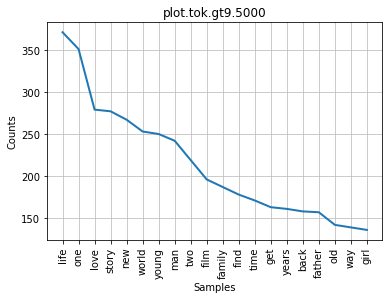

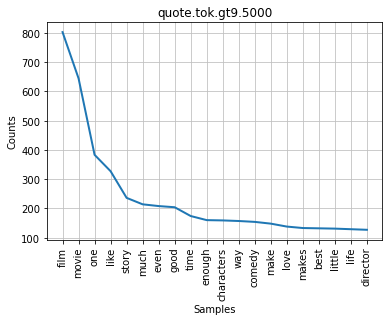

In [12]:
from nltk import FreqDist
#частотный график встречаемости слов в тексте.
for i in subjectivity.fileids():
    
    tokenize_word_subjectivity = nltk.word_tokenize(subjectivity.raw(str(i).lower()))

    without_sw_subjectivity = [i for i in (tokenize_word_subjectivity)
                               if i not in stop_words and i not in punctuation]
    
    fdist = FreqDist(without_sw_subjectivity)
    
#     print(f'{i}:\n{fdist.items()}\n')
#     print(f'most common in {i}:\n {fdist.most_common(10)}\n')

    fdist.plot(20, title=i)

## Выделить частотные слова, относящиеся к одной лемме (провести лемматизацию)

In [13]:
lem = {}
for i in subjectivity.fileids():
    lem[i] =[]
    
print(lem)

{'plot.tok.gt9.5000': [], 'quote.tok.gt9.5000': []}


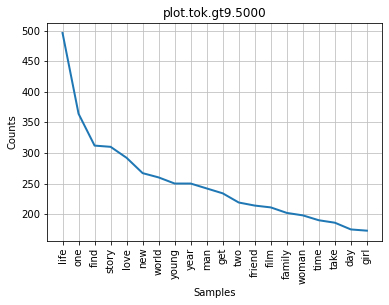

AxesSubplot(0.125,0.125;0.775x0.755)
до леммизации: [('life', 371), ('one', 351), ('love', 279), ('story', 277), ('new', 267), ('world', 253), ('young', 250), ('man', 242), ('two', 219), ('film', 196), ('family', 187), ('find', 178), ('time', 171), ('get', 163), ('years', 161), ('back', 158), ('father', 157), ('old', 142), ('way', 139), ('girl', 136)]

после леммизации: [('life', 496), ('one', 364), ('find', 312), ('story', 310), ('love', 292), ('new', 267), ('world', 260), ('young', 250), ('year', 250), ('man', 242), ('get', 234), ('two', 219), ('friend', 214), ('film', 211), ('family', 202), ('woman', 198), ('time', 190), ('take', 186), ('day', 175), ('girl', 173)]


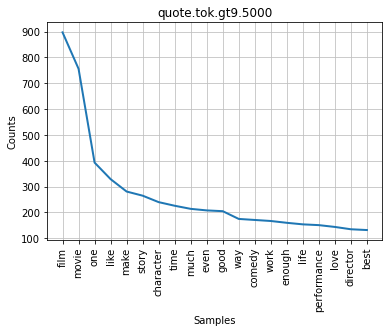

AxesSubplot(0.125,0.125;0.775x0.755)
до леммизации: [('film', 802), ('movie', 644), ('one', 383), ('like', 327), ('story', 236), ('much', 214), ('even', 208), ('good', 204), ('time', 174), ('enough', 160), ('characters', 159), ('way', 157), ('comedy', 154), ('make', 148), ('love', 138), ('makes', 133), ('best', 132), ('little', 131), ('life', 129), ('director', 127)]

после леммизации: [('film', 897), ('movie', 756), ('one', 393), ('like', 329), ('make', 281), ('story', 265), ('character', 240), ('time', 226), ('much', 214), ('even', 208), ('good', 205), ('way', 175), ('comedy', 171), ('work', 167), ('enough', 160), ('life', 154), ('performance', 151), ('love', 144), ('director', 135), ('best', 132)]


In [14]:
#лемматизация
from nltk.stem import WordNetLemmatizer
lematizer = WordNetLemmatizer()

for i in subjectivity.fileids():

    #убираем стоп слова
    tokenize_word_subjectivity = nltk.word_tokenize(subjectivity.raw(str(i).lower()))
    without_sw_subjectivity = [i for i in (tokenize_word_subjectivity)
                               if i not in stop_words and i not in punctuation]
    
    #определяем частотные слова текста до
    fdist = FreqDist(without_sw_subjectivity)

    #леммизируем текст 
    lem[str(i)] = ' '.join([lematizer.lemmatize(i) for i in without_sw_subjectivity])
    
    #определяем частотные слова текста после  
    fd = FreqDist(nltk.word_tokenize(lem[str(i)].lower()))
    
    print(fd.plot(20, title = i, cumulative=False))
    
    print('до леммизации:', fdist.most_common(20))
    print('\nпосле леммизации:', fd.most_common(20))

In [15]:
lem

{'plot.tok.gt9.5000': "movie begin past young boy named sam attempt save celebi hunter emerging human psyche showing characteristic abstract expressionism minimalism russian constructivism graffiti removal secured place history modern art created artist unconscious artistic achievement spurning mother insistence get life mary thrown house rejected joe expelled school grows larger child amitabh ca believe board director mind filled revenge better revenge robbing bank ironic may sound among others excentricities talk small rock gertrude like alive give girl fair chance pulling wool eye using sexiness poach last vestige common sense don might styled vh1 behind music mockumentary profile rise fall internet startup called icevan com blue predicament also lack ability outwardly express emotion killer clue perversion biblical punishment sin stoning burning decapitation david painter painter block take job waiter get inspiration woman craved men wanted set island coast florida techno rave part

## На основе результатов лемматизации вывести на печать слова, определяющие тематику текста (претенденты на ключевые слова). Выделить по частоте и длине.

In [16]:
# !pip install yake

In [17]:
'''1 способ'''

import yake

extractor = yake.KeywordExtractor (

    lan = "en",     # язык
    n = 2,          # максимальное количество слов в фразе
    dedupLim = 0.3, # порог похожести слов
    top = 10        # количество ключевых слов
)

for i in lem:
    print('\n', i)
    print(extractor.extract_keywords(lem[i]))


 plot.tok.gt9.5000
[('young man', 7.813398337327053e-06), ('fall love', 8.40999647123308e-06), ('high school', 1.48841147067635e-05), ('true story', 2.2959231916749305e-05), ('year ago', 2.7448583271514192e-05), ('york city', 2.8717690669801834e-05), ('life', 3.6913898151357144e-05), ('story follows', 3.955996746082433e-05), ('find', 5.887087555884063e-05), ('los angeles', 5.9855126046709984e-05)]

 quote.tok.gt9.5000
[('film make', 1.1082259974074076e-05), ('romantic comedy', 1.1306137661377567e-05), ('love story', 1.2453649724095418e-05), ('movie', 1.3668598616355497e-05), ('good film', 1.6739824752824663e-05), ('make feel', 4.0988480311919484e-05), ('pretty good', 4.906863566658251e-05), ('screen time', 4.9394190251669374e-05), ('big screen', 5.383030562290395e-05), ('character', 5.6051529319603396e-05)]


In [18]:
for i in lem:
    lem[i] = nltk.word_tokenize(lem[i])

In [19]:
'''2 способ'''

for i in lem:
    
    fdist = FreqDist(lem[i])
    
    print('\n', i)
    print(sorted(w for w in set(lem[i])
                 if len(w) > 10 and fdist[w] > 10))
#     print(extractor.extract_keywords(lem[i]))




 plot.tok.gt9.5000
['accidentally', 'circumstance', 'competition', 'complicated', 'consequence', 'contemporary', 'desperately', 'documentary', 'immediately', 'independent', 'information', 'international', 'investigate', 'investigating', 'investigation', 'neighborhood', 'opportunity', 'performance', 'personality', 'professional', 'psychiatrist', 'relationship', 'traditional', 'underground', 'unfortunately']

 quote.tok.gt9.5000
['beautifully', 'combination', 'coming-of-age', 'complicated', 'constructed', 'contemporary', 'development', 'documentary', 'emotionally', 'entertaining', 'entertainment', 'essentially', 'examination', 'exploration', 'extraordinary', 'fascinating', 'forgettable', 'imagination', 'intelligence', 'intelligent', 'interesting', 'masterpiece', 'melodramatic', 'nonetheless', 'occasionally', 'old-fashioned', 'opportunity', 'originality', 'particularly', 'performance', 'predecessor', 'predictable', 'pretentious', 'provocative', 'psychological', 'relationship', 'screenwri

In [20]:
'''3 способ'''

for i in lem:
    print('\n', i)
    
    q = nltk.Text(lem[i])
    q.collocations()


 plot.tok.gt9.5000
new york; best friend; los angeles; high school; fall love; year old;
young man; united state; martial art; year ago; year later; york city;
revolves around; along way; tell story; fianc 233; one day; million
dollar; serial killer; tooth fairy

 quote.tok.gt9.5000
romantic comedy; new york; soap opera; feel like; 've seen; hong kong;
special effect; reign fire; action sequence; ever made; subject
matter; character study; blair witch; play like; harry potter; running
time; kung pow; worth seeing; sandra bullock; never quite


In [21]:
#ключ длина слова - значение кол-во слов с такой длиной

for i in lem:
    print('\n', i)
    
    len_dic = FreqDist(len(w) for w in lem[i])

    print('максимальная длинна по максимальному кол-во слов:', len_dic.max(), '\nстолько слов: ', len_dic[len_dic.max()])
    print('занимают: ', round(100.0 * len_dic.freq(len_dic.max()), 2), '% в тексте')


 plot.tok.gt9.5000
максимальная длинна по максимальному кол-во слов: 4 
столько слов:  13043
занимают:  20.87 % в тексте

 quote.tok.gt9.5000
максимальная длинна по максимальному кол-во слов: 4 
столько слов:  10725
занимают:  18.82 % в тексте


## Провести исследование тематической структуры текста (в каких частях текста о чем говориться) – исследовать частотное расположение слов в тексте - построить график дисперсии.

In [22]:
# !pip install rake-nltk

In [23]:
# for i in lem:
#     lem[str(i)] = ' '.join(lem[i])
    


 plot.tok.gt9.5000
Основная информация первой части текста: decenas de sectas tratan de captar la fe de la cada vez
Основная информация второй части текста: sino con el jolgorio de grandes masas que invadir &# 237
Основная информация третьей части текста: el momento preciso para organizar la verbenesca &# 171

 [('life', 496), ('one', 364), ('find', 312), ('story', 310), ('love', 292)]
most_common 1:  [('life', 171), ('one', 116), ('find', 103), ('love', 91), ('story', 90)]
most_common 2:  [('life', 161), ('one', 131), ('find', 122), ('story', 110), ('love', 107)]
most_common 3:  [('life', 164), ('one', 117), ('story', 110), ('world', 102), ('love', 94)]

частотные слова по частям
{'life': [171, 161, 164], 'one': [116, 131, 117], 'find': [103, 122, 110], 'story': [91, 110, 102], 'love': [90, 107, 94]}

среднее число частотных слов по частям
{'life': 165.33333333333334, 'one': 121.33333333333333, 'find': 111.66666666666667, 'story': 101.0, 'love': 97.0}


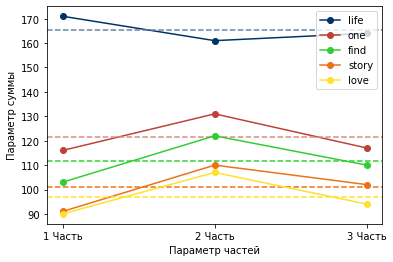





 quote.tok.gt9.5000
Основная информация первой части текста: la traiciã³n que seguramente se convertirã ¡ en un nuevo clã ¡ sico del gã © nero
Основная информация второй части текста: consegue sequer aproveitar os pouquã ­ ssimos momentos em que escapa da mediocridade
Основная информация третьей части текста: es una de las mejores comedias romã ¡ nticas en mucho tiempo

 [('film', 897), ('movie', 756), ('one', 393), ('like', 329), ('make', 281)]
most_common 1:  [('film', 300), ('movie', 251), ('one', 134), ('like', 117), ('make', 90)]
most_common 2:  [('film', 286), ('movie', 266), ('one', 115), ('like', 103), ('story', 91)]
most_common 3:  [('film', 311), ('movie', 239), ('one', 144), ('like', 109), ('make', 104)]

частотные слова по частям
{'film': [300, 286, 311], 'movie': [251, 266, 239], 'one': [134, 115, 144], 'like': [117, 103, 109], 'make': [90, 91, 104]}

среднее число частотных слов по частям
{'film': 299.0, 'movie': 252.0, 'one': 131.0, 'like': 109.66666666666667, 'make'

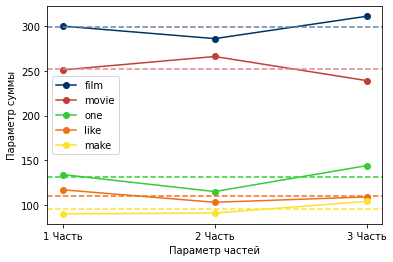

In [24]:
from matplotlib import pyplot as plt
from rake_nltk import Rake
import numpy as np
import pandas as pd

for i in subjectivity.fileids():
    
    rake = Rake()
    rake.extract_keywords_from_sentences(nltk.sent_tokenize(subjectivity.raw( str(i) )))
    
    print('\n', i)
    print('Основная информация первой части текста:', rake.get_ranked_phrases()[1])
    print('Основная информация второй части текста:', rake.get_ranked_phrases()[2])
    print('Основная информация третьей части текста:', rake.get_ranked_phrases()[3])    
    
    #график дисперсии
    fd_d = FreqDist(lem[i])
    mc = fd_d.most_common(5)
    print('\n', mc) #Выводим часто встречающиеся слова и их количество
    
    
    #вывделяем кол-во частотных слов 
    end = int(len(lem[i])/3)
#     print('полностью: ', len(lem[i]))
    
    one = lem[i][:end]
    two = lem[i][end : end*2]
    three = lem[i][end*2:]
    
#     print('1 часть: ', len(one))
#     print('2 часть: ', len(two))
#     print('3 часть: ', len(three))
    
    fd_one = FreqDist(one)
    print('most_common 1: ', fd_one.most_common(5))
    
    fd_two = FreqDist(two)
    print('most_common 2: ', fd_two.most_common(5))
    
    fd_three = FreqDist(three)
    print('most_common 3: ', fd_three.most_common(5))
    
    temp_fd = {}
    print('\nчастотные слова по частям')
    for j in range(len(mc)):
        temp_fd[mc[j][0]] = [fd_one.most_common(5)[j][1], 
                             fd_two.most_common(5)[j][1], 
                             fd_three.most_common(5)[j][1]]
    print(temp_fd)
    
    print('\nсреднее число частотных слов по частям')
    temp_avg = {}
    for i in temp_fd:
        temp_avg[i] = np.mean(temp_fd[i])
    print(temp_avg)
    
    part = ['1 Часть', '2 Часть', '3 Часть'] #Заголовки для оси X

    plt.plot(part, temp_fd[mc[0][0]], marker='o', color='#003366', label=mc[0][0]) #Строим график для bookmark
    plt.axhline(y=temp_avg[mc[0][0]], color='#6684a3', linestyle='--') #Строим среднее значение для bookmark

    plt.plot(part, temp_fd[mc[1][0]], marker='o', color='#be4038', label=mc[1][0])
    plt.axhline(y=temp_avg[mc[1][0]], color='#d88c87', linestyle='--')

    plt.plot(part, temp_fd[mc[2][0]], marker='o', color='#32cd32', label=mc[2][0])
    plt.axhline(y=temp_avg[mc[2][0]], color='#32cd32', linestyle='--')

    plt.plot(part, temp_fd[mc[3][0]], marker='o', color='#ed7117', label=mc[3][0])
    plt.axhline(y=temp_avg[mc[3][0]], color='#ed7117', linestyle='--')

    plt.plot(part, temp_fd[mc[4][0]], marker='o', color='#fee12b', label=mc[4][0])
    plt.axhline(y=temp_avg[mc[4][0]], color='#fee12b', linestyle='--')

    plt.xlabel('Параметр частей')
    plt.ylabel('Параметр суммы')

    plt.legend()
    plt.show()

    print('\n\n')

## Распечатать ключевые слова (частотные слова), относящиеся к наиболее тематически важному разделу текста (определить по графику дисперсии). Для них построить частотный график встречаемости слов в тексте. Кумулятивный график частотного распределения слов.


частотные слова по частям
{'film': [171, 161, 164], 'movie': [116, 131, 117], 'one': [103, 122, 110], 'like': [91, 110, 102], 'make': [90, 107, 94]}
Самаый важный тематический раздел: 2 часть текста
[('life', 161), ('one', 131), ('find', 122), ('story', 110), ('love', 107)]


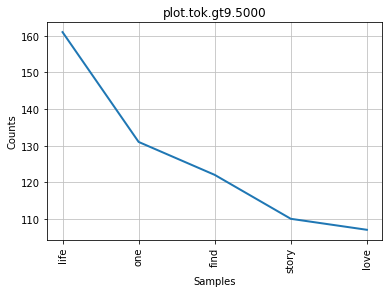

AxesSubplot(0.125,0.125;0.775x0.755)

частотные слова по частям
{'film': [300, 286, 311], 'movie': [251, 266, 239], 'one': [134, 115, 144], 'like': [117, 103, 109], 'make': [90, 91, 104]}
Самаый важный тематический раздел: 3 часть текста
[('film', 311), ('movie', 239), ('one', 144), ('like', 109), ('make', 104)]


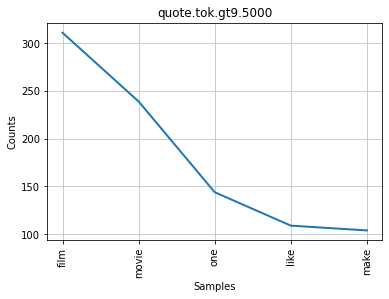

AxesSubplot(0.125,0.125;0.775x0.755)


In [25]:
for i in subjectivity.fileids():
    end = int(len(lem[i])/3)
#     print('полностью: ', len(lem[i]))
    
    one = lem[i][:end]
    two = lem[i][end : end*2]
    three = lem[i][end*2:]
    
#     print('1 часть: ', len(one))
#     print('2 часть: ', len(two))
#     print('3 часть: ', len(three))
    
    fd_one = FreqDist(one)
#     print('most_common 1: ', fd_one.most_common(5))
    
    fd_two = FreqDist(two)
#     print('most_common 2: ', fd_two.most_common(5))
    
    fd_three = FreqDist(three)
#     print('most_common 3: ', fd_three.most_common(5))
    
    mc = fd_d.most_common(5)
        
    temp_fd = {}
    print('\nчастотные слова по частям')
    for j in range(len(mc)):
        temp_fd[mc[j][0]] = [fd_one.most_common(5)[j][1], 
                             fd_two.most_common(5)[j][1], 
                             fd_three.most_common(5)[j][1]]
    print(temp_fd)
    
    o, t, th = 0, 0, 0
    for j in range(len(mc)):
        if max(temp_fd[mc[j][0]]) == temp_fd[mc[j][0]][0]:
#             print(max(temp_fd[mc[j][0]]))
#             print('1 часть')
            o+=1
        elif max(temp_fd[mc[j][0]]) == temp_fd[mc[j][0]][1]:
#             print(max(temp_fd[mc[j][0]]))
#             print('2 часть')
            t+=1
        elif max(temp_fd[mc[j][0]]) == temp_fd[mc[j][0]][2]:
#             print(max(temp_fd[mc[j][0]]))
#             print('3 часть')
            th+=1
        
#     print(o, ' ', t, ' ', th)
    if o > t and o > th:
        print("Самаый важный тематический раздел: 1 часть текста")
        print(fd_one.most_common(5))
        print(fd_one.plot(5, title = i, cumulative=False))
    elif t > o and t > th:
        print("Самаый важный тематический раздел: 2 часть текста")
        print(fd_two.most_common(5))
        print(fd_two.plot(5, title = i, cumulative=False))
    else:
        print("Самаый важный тематический раздел: 3 часть текста")
        print(fd_three.most_common(5))
        print(fd_three.plot(5, title = i, cumulative=False))

    
    

## Для ключевых слов найти им соответствующие биграммы в тексте, оценить их частотность.


In [26]:
# for i in lem:
#     lem[str(i)] = ' '.join(lem[i])
    

In [32]:
# lem

In [37]:
for i in subjectivity.fileids():
    print(i, '\n', len(list(nltk.bigrams(lem[i]))), '\n')

plot.tok.gt9.5000 
 62507 

quote.tok.gt9.5000 
 56986 



[('life', 496), ('one', 364), ('find', 312)]
bigramms counts:  {'life': 730, 'one': 544, 'find': 486}



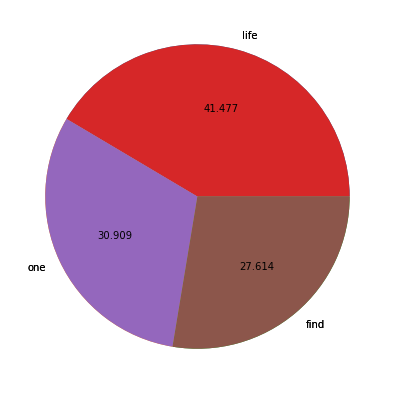

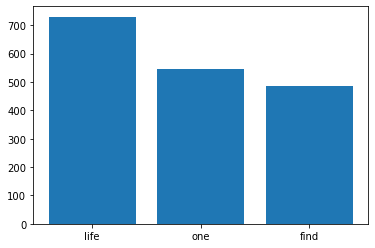


[('film', 897), ('movie', 756), ('one', 393)]
bigramms counts:  {'film': 1306, 'movie': 1062, 'one': 598}



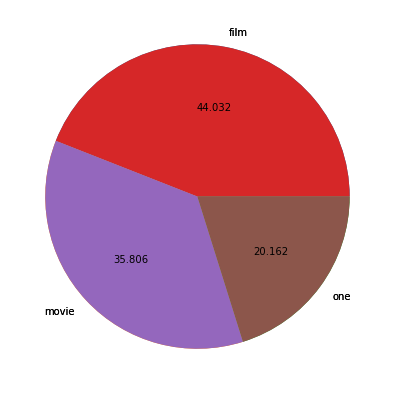

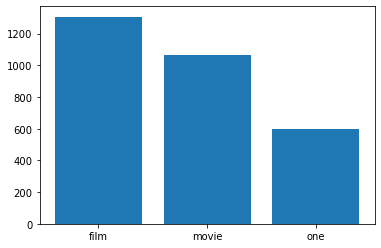

In [118]:
for i in subjectivity.fileids():
    fd_bigrams = FreqDist(lem[i])
    print(fd_bigrams.most_common(3))
    
    bigrams_di = {}
    bigrams = nltk.bigrams(lem[i])
    list_set_bigrams = list(set(bigrams))
    
    for l in range(3):
        counter_bigrams = 0
        bigrams_di[fd_bigrams.most_common(3)[l][0]] = []
#         print(fd_bigrams.most_common(3)[l][0])
        for key,value in list_set_bigrams: #Циключиное удаление одинаковых биграмм  
#             print(l)
            if ((key) == (fd_bigrams.most_common(3)[l][0]) or (value) == (fd_bigrams.most_common(3)[l][0])): #Условие для вывода биграмм, в которых обязательно будет ключевое слово bookmark
#                 print(key, value) #Вывод уникальных биграмм на экран
                
                counter_bigrams += 1 #Счётчик биграмм
                bigrams_di[fd_bigrams.most_common(3)[l][0]] = counter_bigrams
    
    print("bigramms counts: ", bigrams_di)
    print()
    
    fig = plt.figure(figsize=(7, 7))
    ax = fig.add_subplot()
    vals = [bigrams_di[fd_bigrams.most_common(3)[0][0]], 
            bigrams_di[fd_bigrams.most_common(3)[1][0]], 
            bigrams_di[fd_bigrams.most_common(3)[2][0]]]
    labels = [fd_bigrams.most_common(3)[0][0], fd_bigrams.most_common(3)[1][0], fd_bigrams.most_common(3)[2][0]]
    ax.pie(vals, labels=labels)
    exp = (0, 0, 0)
    ax.pie(vals, labels=labels, autopct='%.3f', explode=exp, shadow=False)
    plt.show()
    print()
    
    index0 = np.arange(3)
    plt.bar(index0, vals)
    plt.xticks(index0, labels)
    plt.show()
        
    print()

## Привести пример синтаксического анализа

In [140]:
from nltk import parse, CFG
from nltk.draw.tree import draw_trees
import svgling

grammar = CFG.fromstring("""
S -> NP VP
NP -> Det N | Det N PP
VP -> V NP | V NP PP
PP -> P NP
NP -> 'I'
N -> 'man' | 'park'
Det -> 'the' | 'a'
P -> 'in' | 'with'
V -> 'saw'
""")
print(grammar, '\n')

sent = 'I saw a man in the park'.split()

# for tree in cparser.parse(sent):
#     print(tree)
    
cparser = nltk.ChartParser(grammar)
draw_trees(*(tree for tree in cparser.parse(sent)))
# svgling.draw_tree(tree)

Grammar with 14 productions (start state = S)
    S -> NP VP
    NP -> Det N
    NP -> Det N PP
    VP -> V NP
    VP -> V NP PP
    PP -> P NP
    NP -> 'I'
    N -> 'man'
    N -> 'park'
    Det -> 'the'
    Det -> 'a'
    P -> 'in'
    P -> 'with'
    V -> 'saw' 

